## Importing Libraries

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

## How to choose the Best Linear Regression Model for our Dataset?

We will perform three different Regression models for our dataset.

- Linear Regression

- Ridge

- Lasso

We will measure Accuracy and the Rsquare of the models to be able to make a supported decision about wwhick models better suits our dataset.

In [35]:
advertising_df = pd.read_csv('advertising_and_sales_clean.csv')
advertising_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


We want to predict Sales with the columns tv, radio, social_media. We will not use the column influencer because scikit_learn only accepts numerical variables.

In [36]:
advertising_df.drop('influencer',axis = 'columns', inplace = True)

In [37]:
advertising_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


## Exploration Data Analysis

Before we start modelling. Let's verify some key features of our variables

Do we have any missing values?

In [38]:
advertising_df.isna().sum().sort_values()

tv              0
radio           0
social_media    0
sales           0
dtype: int64

Let's check some characteristics

In [39]:
advertising_df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


Usually it's advisable to scale our variables (we can use StandardScaler from scikit_learn), however looking to the

features characteristics we will not use, for now, because they are in the same order of magnitude.

## Plot and analyze relationship between variables

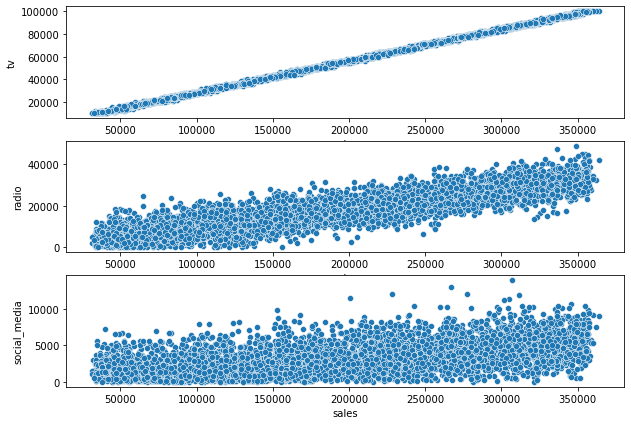

In [23]:
fig, ax = plt.subplots(3,1, figsize=(10,7))
count = 0 
for column in advertising_df[['tv','radio','social_media']].columns:
    sns.scatterplot(x = advertising_df['sales'], y = advertising_df[column], data = advertising_df, ax = ax[count])
    count +=1

We can check some correlation between variables with sales. Meaning that linear regression will be a good predicting for this dataset.

## Alpha - Ridge & Lasso

Before we start the comparison between models, we want to optimize alpha in Ridge and Lasso.

Remember that great alpha can cause overfitting and smaller alpha can promote underfitting.

We will use alphas from 0.01 to 1000 and iterate over it.

First we will divide the dataset into test and train

In [47]:
#Divide the dataset into features and label before do the separation between Train & Test
X = advertising_df.drop("sales", axis='columns').values
y = advertising_df["sales"].values

#We will go with a test size of 30% of the total len of the dataset. Try to be alwyas between 20-30%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Alphas will be between 0.01 and 1000
alphas = np.linspace(0.01,1000, 1000)
score_ridge = []
alpha_score = []
for alpha in alphas:
    #Initiate the Ridge
    ridge = Ridge(alpha = alpha)
    #Fit the data
    ridge.fit(X_train,y_train)
    
    #Get the R-Squared
    score = ridge.score(X_test, y_test)
    score_ridge.append(score)
    alpha_score.append(alpha)
score_ridge[:10]

[0.9990152104759368,
 0.9990152104759373,
 0.9990152104759379,
 0.9990152104759383,
 0.9990152104759389,
 0.9990152104759393,
 0.9990152104759399,
 0.9990152104759403,
 0.9990152104759409,
 0.9990152104759413]

Looking to alpha this doesn't change much al alpha increases so we have no underfitting or overfitting of the data.

We will getting petty here but let's check which of the alphas will optimize our models.

In [56]:
#Finding the position of the max score ridge in the array
score_ridge.index(np.max(score_ridge))

#Find the alpha in the alpha list
alpha_score[score_ridge.index(np.max(score_ridge))]

1000.0

For our analysis we will use alpha = 1000.

## Models Analysis

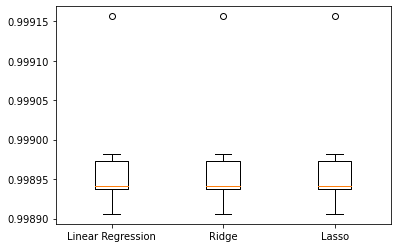

In [63]:
#Make a dictionary with the models that you want to test
#We will use an alpha of 1000 as we said above
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=1000), "Lasso": Lasso(alpha=1000)}
results = []

# Loop through the models' values
for model in models.values():
    #n_splits it's a default of 5, we will consider 6
    #always shuffle the data to obtain different data to work with
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

We obtain the same accuracy for the models that we are testing so we don't have for now any idea which model we will use.

Let's make predictions and evaluate the R mean square.

In [64]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=1000), "Lasso": Lasso(alpha=1000)}
#loop over Keys & values of the dictionary that we are using.
for name, model in models.items():
  
    # Fit the model to the training data
    model.fit(X_train,y_train)
  
    # Make predictions on the test set
    y_pred = model.predict(X_test)
  
    # Calculate the test_rmse
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 2944.433199600097
Ridge Test Set RMSE: 2944.4331988497274
Lasso Test Set RMSE: 2944.3864403035545


We obtain almost the same result for the different models.

So we can conclude that no matter the model that we use the predictions will be the roughly the same.

How is R squared can the features of the different models explain the variance in sales?

In [68]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=1000), "Lasso": Lasso(alpha=1000)}
#loop over Keys & values of the dictionary that we are using.
for name, model in models.items():
  
    # Fit the model to the training data
    model.fit(X_train,y_train)
  
    # Make predictions on the test set
    y_pred = model.predict(X_test)
  
    # Calculate the test_rmse
    r_square = model.score(X_test,y_test)
    
    print("{} Test Set RSquare: {}".format(name, r_square))

Linear Regression Test Set RSquare: 0.9990152104759368
Ridge Test Set RSquare: 0.9990152104764387
Lasso Test Set RSquare: 0.9990152417537391


This means that the features explain about 99% of variance in sales.

So any of the three could be used to predict sales amount.

To finish we will verify which feature is most significant to predict the sales with Lasso

[ 3.56254584 -0.00385276  0.0045959 ]


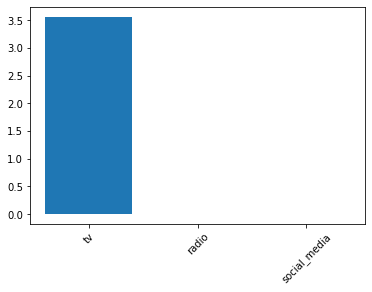

In [72]:
#Starting Lasso with the optimal alpha
lasso = Lasso(alpha=1000)

# Fit the model to the ORIGINAL data
lasso.fit(X, y)

# Compute and print the coefficients using coef_
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(advertising_df[['tv','radio','social_media']].columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## TV is in fact, by far, the best predictor for sales!!!